In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.shape
#high dimension data

(6819, 96)

In [8]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [9]:
x = df.iloc[:,1:]
y = df.iloc[:, :1]

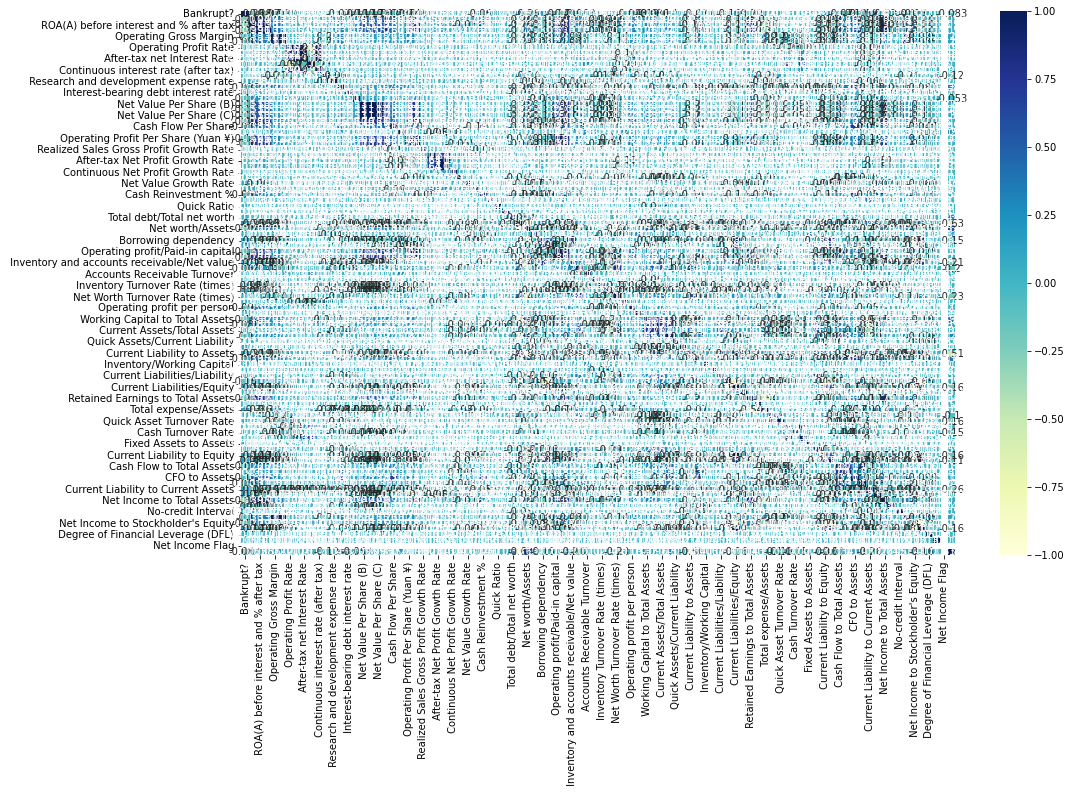

In [10]:
# importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns
# plot heatmap to check the correlation coefficients

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
cor_var = correlation(df,0.9)
cor_var

{' After-tax net Interest Rate',
 ' Cash Flow to Sales',
 ' Continuous interest rate (after tax)',
 ' Current Liability to Equity',
 ' Current Liability to Liability',
 ' Gross Profit to Sales',
 ' Liability to Equity',
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Net profit before tax/Paid-in capital',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Pre-tax net Interest Rate',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Regular Net Profit Growth Rate'}

# Train test split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 102)

In [22]:

from imblearn.over_sampling import SMOTE
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Bankrupt?
0            6599
1             220
dtype: int64


In [24]:
# Perform SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)



In [26]:
from imblearn.over_sampling import SMOTE
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Bankrupt?
0            6599
1            6599
dtype: int64


In [29]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.25, random_state = 102)

In [30]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = rf_classifier.predict(xtest)

# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get a detailed classification report
print(classification_report(ytest, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1651
           1       0.96      0.99      0.98      1649

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300



In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get a detailed classification report
print(classification_report(ytest, y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.59      0.76      0.66      1651
           1       0.66      0.47      0.55      1649

    accuracy                           0.62      3300
   macro avg       0.63      0.62      0.61      3300
weighted avg       0.63      0.62      0.61      3300



# Feature Engineering


In [79]:
from sklearn.decomposition import PCA
n_components = 22
# Choose the number of principal components
pca = PCA(n_components=n_components)
xtrain2 = pca.fit_transform(xtrain)
xtest2 = pca.transform(xtest)

In [80]:
lr1 = LogisticRegression()
lr1.fit(xtrain2,ytrain)
y_pred = lr1.predict(xtest2)
# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get a detailed classification report
print(classification_report(ytest, y_pred))

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1651
           1       0.64      0.60      0.62      1649

    accuracy                           0.64      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.64      0.64      0.64      3300



In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param = {'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced']}

random_search = GridSearchCV(lr1, param, cv=5)
random_search.fit(xtrain2, ytrain)
print("best hyperparameters: ", random_search.best_params_)

best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(xtest2)

# Evaluate the model
report = classification_report(ytest, y_pred)
print(report)

best hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1651
           1       0.64      0.61      0.62      1649

    accuracy                           0.64      3300
   macro avg       0.64      0.64      0.63      3300
weighted avg       0.64      0.64      0.63      3300



In [85]:
print("best hyperparameters: "," 'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'")


best hyperparameters:   'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [87]:
# Create and train the classification models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(xtrain2, ytrain)
    
    # Make predictions on the test data
    y_pred = model.predict(xtest2)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(ytest, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Get a detailed classification report
    print(f"Classification Report for {name}:")
    print(classification_report(ytest, y_pred))
    print('-' * 40)

Training Logistic Regression...
Accuracy: 0.64
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1651
           1       0.64      0.60      0.62      1649

    accuracy                           0.64      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.64      0.64      0.64      3300

----------------------------------------
Training Decision Tree...
Accuracy: 0.91
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      1651
           1       0.89      0.93      0.91      1649

    accuracy                           0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300

----------------------------------------
Training Random Forest...
Accuracy: 0.95
Classification Report for Random Forest:
      

In [90]:
base_models = [
    LogisticRegression(random_state=42),RandomForestClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(random_state=42),SVC(random_state=42),KNeighborsClassifier()
]

predictions = np.zeros((xtest.shape[0], len(base_models)))
meta_model = LogisticRegression()

# Create an array to hold the predictions of base models on the test set
predictions = np.zeros((xtest.shape[0], len(base_models)))

# Train the base models and make predictions on the test set
for i, model in enumerate(base_models):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    predictions[:, i] = y_pred

# Train the meta-model on the predictions of base models
meta_model.fit(predictions, ytest)

# Make final predictions using the stacking model
final_predictions = meta_model.predict(predictions)

# Evaluate the stacking model
accuracy = accuracy_score(ytest, final_predictions)
print("Stacking Model Accuracy:", accuracy)


Stacking Model Accuracy: 0.9815151515151516
